In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "/Users/zhengzhang/PythonProjects/TIBEC/REACH_Efield.txt"
antenna_sph_coords = np.loadtxt(path,
                                comments=('// >>', '73 37', '#'),
                                usecols=(0, 1),
                                max_rows=73 * 37, ).reshape(-1, 2)
theta_coords = np.unique(antenna_sph_coords[:, 1])
phi_coords = np.unique(antenna_sph_coords[:,0])

# E-field data shape: (frequency, theta, phi, 2)
e_field = (np.loadtxt(path,
                      comments=('// >>', '73 37'),
                      usecols=(2, 4),
                      ) + 1j * np.loadtxt(path,
                                          comments=('// >>', '73 37'),
                                          usecols=(3, 5),
                                          )).reshape(26, 73, 37, 2)

e_theta = e_field[:,:,:,0]
e_phi = e_field[:,:,:,1]

$$
\text{AR} = \sqrt{\frac{|E_1|^2+|E_2|^2 + |E_1^2+E_2^2|}{|E_1|^2+|E_2|^2 - |E_1^2+E_2^2|}}
$$

In [2]:
# Calculate the axial ratio
AR = np.sqrt((np.abs(e_theta)**2 + np.abs(e_phi)**2 + np.abs(e_theta**2 + e_phi**2))
             /(np.abs(e_theta)**2 + np.abs(e_phi)**2 - np.abs(e_theta**2 + e_phi**2)))

AR_phi = np.mean(AR, axis=2) # average over theta
AR_theta = np.mean(AR, axis=1) # average over phi

# Plots of AR for the lowest frequency

## AR(in decibels, averaged over phi) vs theta

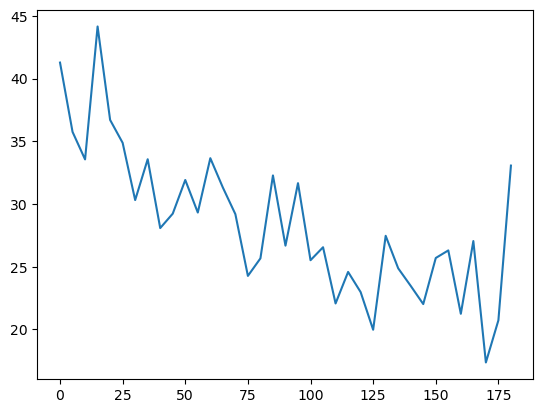

In [3]:
plt.plot(theta_coords, 10*np.log10(AR_theta[0]))

## AR(in decibels, averaged over theta) vs phi

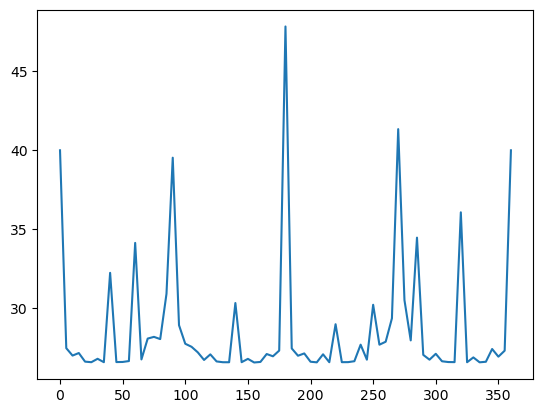

In [4]:
plt.plot(phi_coords, 10*np.log10(AR_phi[0]))

# Plots of AR for the highest frequency

## AR(in decibels, averaged over phi) vs theta

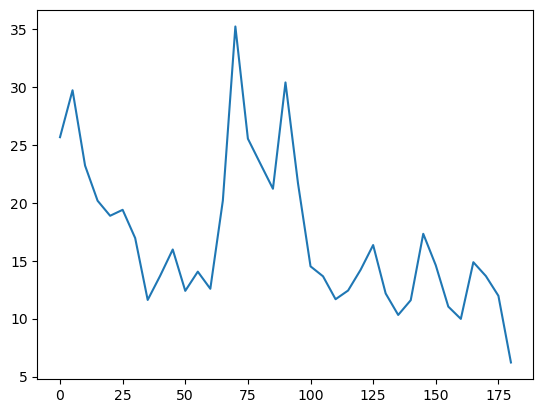

In [5]:
plt.plot(theta_coords, 10*np.log10(AR_theta[-1]))

## AR(in decibels, averaged over theta) vs phi

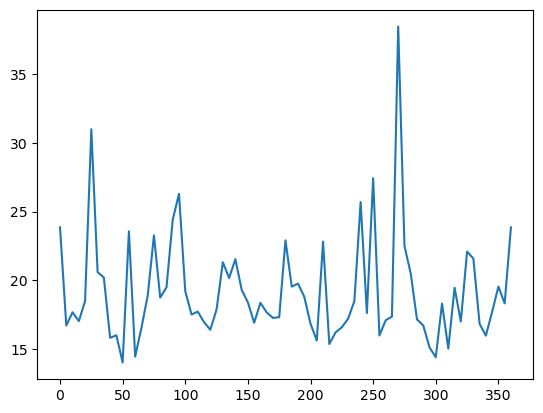

In [6]:
plt.plot(phi_coords, 10*np.log10(AR_phi[-1]))